In [8]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import random
import numpy as np
from sympy import primerange
%matplotlib inline
from livelossplot import PlotLosses

In [2]:
cities = pd.read_csv("dataset/cities.csv")

In [3]:
tour = pd.read_csv("submition_181206_v_1516768.4747805735.csv")['Path'].tolist()

In [4]:
primes = list(primerange(0, len(cities)))

In [5]:
def score_tour(tour):
    # length of any given tour with primes calculation
    df = cities.reindex(tour + [0]).reset_index()
    df['prime'] = df.CityId.isin(primes).astype(int)
    df['dist'] = np.hypot(df.X - df.X.shift(-1), df.Y - df.Y.shift(-1))
    df['penalty'] = df['dist'][9::10] * (1 - df['prime'][9::10]) * 0.1
    return df.dist.sum() + df.penalty.sum()

In [6]:
def local2op(path, i, k):
    tmp = path[i:k]
    return path[0:i] + tmp[::-1] + path[k:]

In [59]:
def swap(path, i, k):
    path[i], path[k] = path[k], path[i]
    return path

In [51]:
def ap(cnew, cold, T):
    return 1 / np.exp((cnew - cold) / T)

In [58]:
print(ap(30,29,1))

0.367879441171


In [39]:
print(1,2)

1 2


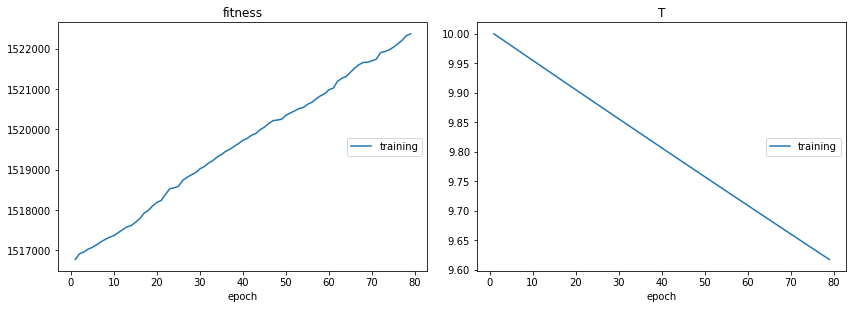

fitness:
training   (min: 1516768.475, max: 1522371.241, cur: 1522371.241)

T:
training   (min:    9.617, max:   10.000, cur:    9.617)


In [ ]:
best_tour = score_tour(tour)
T = 10.0
T_min = 0.01
alpha = 0.9995
tour_best = tour.copy()
liveplot = PlotLosses()

while T_min < T:
    liveplot.update({
                    'fitness': best_tour,
                    'T': T,
                })
    liveplot.draw()
    for i in range(100):
        a = random.randint(1, len(tour_best) - 20)
        b = random.randint(a+1, a+19)
        tour_tmp = swap(tour_best.copy(), a, b)
        fitness_tmp = score_tour(tour_tmp)
        if fitness_tmp < best_tour:
            tour_best = tour_tmp
            pd.DataFrame({"Path": tour_best}).to_csv("submition_anneal_v_{}.csv".format(fitness_tmp), index=False)
            best_tour = fitness_tmp
        else:
            aprob = ap(fitness_tmp, best_tour, T)
            if random.uniform(0,1) <  aprob:
                tour_best = tour_tmp
                best_tour = fitness_tmp
    T = T*alpha